In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize
import warnings
# warnings.filterwarnings("default")
warnings.filterwarnings("ignore")

In [13]:
def model(fi=1):
    #вид1
    dx = lambda x,y: y
    #вид2
    dy = lambda x,y: fi*(1-(x**2))*y-x
    fun = lambda p,t: [ dx(*p), dy(*p) ]
    
    return fun, dx, dy

initX = [-3,-2,-1 , 0,1,2,3]
initY = [-3,-2,-1 , 0,1,2,3]
fiMass = [-3, -2, -1, 0, 1, 2, 3]

time = np.linspace(0, 300, 10000)


In [14]:


statPoints = []
statLines = []

# statPoint0
statPoints.append([0, 0])


# statLine
# X=[];Y=[]
# for x in np.linspace(0,max(initX),1000):
#     y = 2*r*K/(r+a*K) - x
#     if ( x >= 0 and y >= 0 ):
#         X.append(x); Y.append(y)
# statLines.append([X,Y])



title= '''
    y
    fi*(1-(x**2))*y-x
    stat0={}
    fiMass={}
    '''.format(*statPoints, fiMass)

print(title)


    y
    fi*(1-(x**2))*y-x
    stat0=[0, 0]
    fiMass=[-3, -2, -1, 0, 1, 2, 3]
    


In [15]:

for fi in fiMass:
    Pxx = lambda x,y: 0
    Pxy = lambda x,y: 1
    Pyx = lambda x,y: -2*x*fi*y-1
    Pyy = lambda x,y: fi-(x**2*fi)

    J = lambda p: np.array([
        [Pxx(*p), Pxy(*p)],
        [Pyx(*p), Pyy(*p)]
    ])


    for i in range(len(statPoints)):
        print("Stationary", i, ':', statPoints[i], ' fi: ', fi)
        # print("Jacobian")
        # print(J(statPoints[i]))
        # print(J(statPoints[i]))
        w,v = eig(J(statPoints[i]))
        print("Eigenvalues", w)

        if (w[0] == 0 and w[1] == 0):
            print('центр')
        else:
            if (np.iscomplex(w[0])):
                if (np.real(w[0]<0)):
                    print("устойчивый фокус")
                else:
                    print("неустойчивый фокус")
            else: 
                if (w[0] <=0 and w[1]<=0):
                    print("устойчивый узел")
                else: 
                    if (w[0] <=0 or w[1]<=0):
                        print("седло")
                    else: 
                        print("неустойчивый узел")
        print(" =============== \n")

Stationary 0 : [0, 0]  fi:  -3
Eigenvalues [-0.38196601 -2.61803399]
устойчивый узел

Stationary 0 : [0, 0]  fi:  -2
Eigenvalues [-1. -1.]
устойчивый узел

Stationary 0 : [0, 0]  fi:  -1
Eigenvalues [-0.5+0.8660254j -0.5-0.8660254j]
устойчивый фокус

Stationary 0 : [0, 0]  fi:  0
Eigenvalues [0.+1.j 0.-1.j]
неустойчивый фокус

Stationary 0 : [0, 0]  fi:  1
Eigenvalues [0.5+0.8660254j 0.5-0.8660254j]
неустойчивый фокус

Stationary 0 : [0, 0]  fi:  2
Eigenvalues [1. 1.]
неустойчивый узел

Stationary 0 : [0, 0]  fi:  3
Eigenvalues [0.38196601 2.61803399]
неустойчивый узел



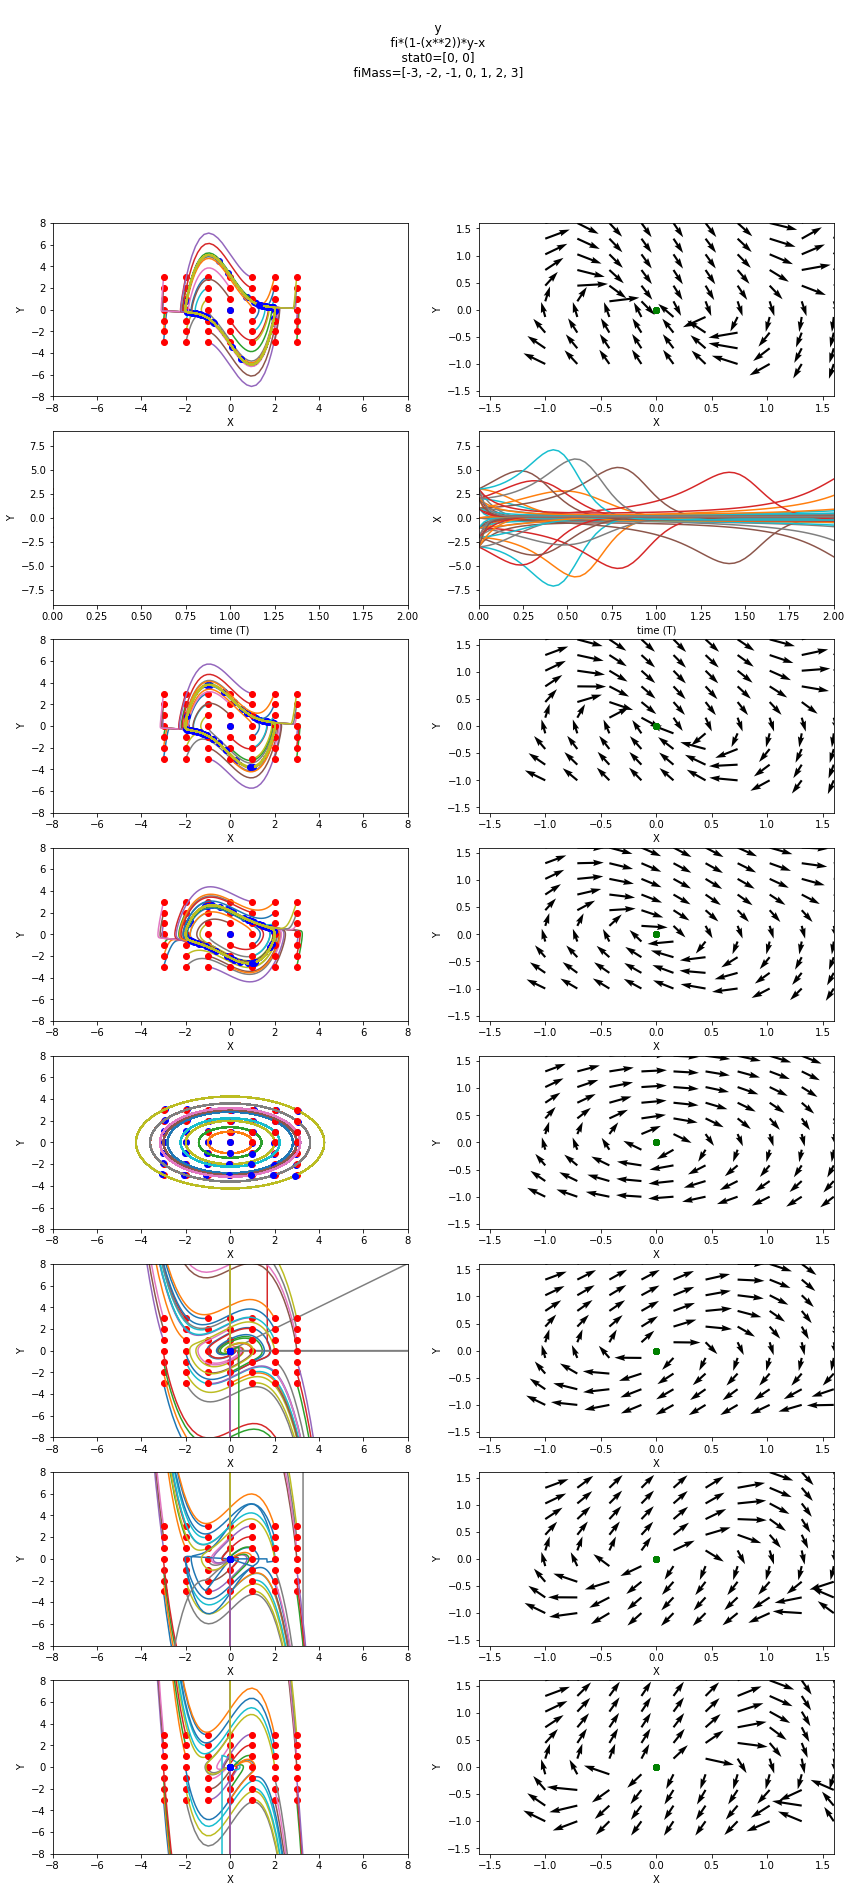

In [17]:
%matplotlib inline

def deleteNegative(mass):
    return mass[~np.any(mass < 0, axis=1)]

sizeX = max(initX) + 5
sizeY = max(initY) + 5
sizeXTime = max(initX) * 3
sizeYTime = max(initY) * 3
sizeTime = 2
sizeXquiver = sizeX / 5
sizeYquiver = sizeY / 5


fig, (
    (plotYXFi1, plotYXFi1quiver),
    (plotYTFi1, plotXTFi1),
    (plotYXFi2, plotYXFi2quiver),
    (plotYXFi3, plotYXFi3quiver),
    (plotYXFi4, plotYXFi4quiver),
    (plotYXFi5, plotYXFi5quiver),
    (plotYXFi6, plotYXFi6quiver),
    (plotYXFi7, plotYXFi7quiver)
) = plt.subplots(8, 2, figsize=(14,30), squeeze=False)

plotsYXFiquiver = [plotYXFi1quiver, plotYXFi2quiver, plotYXFi3quiver, plotYXFi4quiver, plotYXFi5quiver, plotYXFi6quiver, plotYXFi7quiver]
plotsYXFi = [plotYXFi1, plotYXFi2, plotYXFi3, plotYXFi4, plotYXFi5, plotYXFi6, plotYXFi7]

fig.suptitle(title)

### quivers

for i_fi in range(len(fiMass)):
    fun, dx, dy = model(fi=fiMass[i_fi])

    Xm, Ym = np.meshgrid(np.linspace(-1,sizeXquiver,10), np.linspace(-1,sizeYquiver,10))
    plotsYXFiquiver[i_fi].quiver( Xm, Ym, 
        dx(Xm,Ym)/np.sqrt(dx(Xm,Ym)**2+dy(Xm,Ym)**2), 
        dy(Xm,Ym)/np.sqrt(dx(Xm,Ym)**2+dy(Xm,Ym)**2), 
        # dx(Xm,Ym),
        # dy(Xm,Ym),
        scale_units='xy',  angles='xy')

    plotsYXFiquiver[i_fi].set_xlabel('X')
    plotsYXFiquiver[i_fi].set_ylabel('Y')  
    plotsYXFiquiver[i_fi].set_xlim(-sizeXquiver,sizeXquiver); 
    plotsYXFiquiver[i_fi].set_ylim(-sizeXquiver,sizeXquiver)
    # plotsYXFiquiver[i_fi].set_title('fi='+str(fi))

        ## statPoints
    for cur_plot in plotsYXFiquiver:
        for stat in statPoints:
            cur_plot.plot(stat[0], stat[1], 'go')


    for X0 in initX:
        for Y0 in initY:
            result = odeint(fun, [X0, Y0], time)
            plotsYXFi[i_fi].plot(result[:, 0], result[:, 1])
            plotsYXFi[i_fi].plot(result[0, 0], result[0, 1], 'ro')
            plotsYXFi[i_fi].plot(result[-1, 0], result[-1, 1], 'bo')
            # plotsYXFi[i_fi].set_title('fi='+str(fi))

            plotsYXFi[i_fi].set_xlabel('X')
            plotsYXFi[i_fi].set_ylabel('Y')  
            plotsYXFi[i_fi].set_xlim(-sizeX,sizeY); 
            plotsYXFi[i_fi].set_ylim(-sizeX,sizeY)
                    
            # график X от T
            if i_fi == 0: 
                plotYTFi1.plot(time, result[:, 1])
                plotXTFi1.plot(time, result[:, 0])
                # plotYTFi1[i_fi].set_title('fi='+str(fi))
                plotXTFi1.plot(time, result[:, 1])


#         r=initR; K=initK; a=initA


plotYTFi1.set_xlabel('time (T)')
plotYTFi1.set_ylabel('Y')    
plotYTFi1.set_xlim(0, sizeTime); 
plotYTFi1.set_ylim(-sizeYTime, sizeYTime)

plotXTFi1.set_xlabel('time (T)')
plotXTFi1.set_ylabel('X')    
plotXTFi1.set_xlim(0, sizeTime); 
plotXTFi1.set_ylim(-sizeXTime, sizeXTime)


plt.show()
